This notebook looks at multi-label classification on the handwriten digits zero to nine. The dataset used is a scaled down version on MNIST. 

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import torch

from raytracerthing import RayTracerThing, Activations

np.random.seed(42)

In [2]:
digits = load_digits()
y = digits['target']

X = digits['images']
X = X / X.max()
N = X.shape[0]
image_shape = X.shape[1:]

print(N, image_shape)

print(y[:5])

1797 (8, 8)
[0 1 2 3 4]


In [3]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [5]:
%%time

clf = RayTracerThing(input_shape=image_shape,
                     hidden_layer_shape=(10, 10), 
                     n_hidden_layers=7,
                     n_classes=10,
                     activation_func=Activations.softmax,
                     loss_func=torch.nn.functional.cross_entropy,
                     learning_rate=1,
                     pixel_density=16)

CPU times: user 1.89 s, sys: 266 ms, total: 2.16 s
Wall time: 2.16 s


In [6]:
%time clf.fit(X_train, y_train, batch_size=16, n_epochs=1000, early_stopping_epsilon=1e-5)

Epoch 1 of 1000 - train_loss: 2.2937 - train_acc: 0.1371 - val_loss: 2.2471 - val_acc: 0.2535
Epoch 2 of 1000 - train_loss: 2.2105 - train_acc: 0.3091 - val_loss: 2.1561 - val_acc: 0.3785
Epoch 3 of 1000 - train_loss: 2.1446 - train_acc: 0.3701 - val_loss: 2.1129 - val_acc: 0.4410
Epoch 4 of 1000 - train_loss: 2.0772 - train_acc: 0.4760 - val_loss: 2.0588 - val_acc: 0.5069
Epoch 5 of 1000 - train_loss: 2.0143 - train_acc: 0.5619 - val_loss: 2.0214 - val_acc: 0.5278
Epoch 6 of 1000 - train_loss: 1.9745 - train_acc: 0.6105 - val_loss: 1.9742 - val_acc: 0.6042
Epoch 7 of 1000 - train_loss: 1.9445 - train_acc: 0.6437 - val_loss: 1.9539 - val_acc: 0.6389
Epoch 8 of 1000 - train_loss: 1.9277 - train_acc: 0.6515 - val_loss: 1.9396 - val_acc: 0.6354
Epoch 9 of 1000 - train_loss: 1.9168 - train_acc: 0.6532 - val_loss: 1.9311 - val_acc: 0.6389
Epoch 10 of 1000 - train_loss: 1.9092 - train_acc: 0.6550 - val_loss: 1.9235 - val_acc: 0.6424
Epoch 11 of 1000 - train_loss: 1.9023 - train_acc: 0.6567 -

Epoch 87 of 1000 - train_loss: 1.8737 - train_acc: 0.6760 - val_loss: 1.8896 - val_acc: 0.6528
Epoch 88 of 1000 - train_loss: 1.8737 - train_acc: 0.6760 - val_loss: 1.8896 - val_acc: 0.6528
Epoch 89 of 1000 - train_loss: 1.8737 - train_acc: 0.6760 - val_loss: 1.8895 - val_acc: 0.6528
Epoch 90 of 1000 - train_loss: 1.8737 - train_acc: 0.6760 - val_loss: 1.8895 - val_acc: 0.6528
Epoch 91 of 1000 - train_loss: 1.8736 - train_acc: 0.6760 - val_loss: 1.8895 - val_acc: 0.6528
Epoch 92 of 1000 - train_loss: 1.8736 - train_acc: 0.6760 - val_loss: 1.8895 - val_acc: 0.6528
Epoch 93 of 1000 - train_loss: 1.8736 - train_acc: 0.6760 - val_loss: 1.8894 - val_acc: 0.6528
Epoch 94 of 1000 - train_loss: 1.8736 - train_acc: 0.6760 - val_loss: 1.8894 - val_acc: 0.6528
Epoch 95 of 1000 - train_loss: 1.8736 - train_acc: 0.6760 - val_loss: 1.8894 - val_acc: 0.6528
Epoch 96 of 1000 - train_loss: 1.8736 - train_acc: 0.6760 - val_loss: 1.8894 - val_acc: 0.6528
Epoch 97 of 1000 - train_loss: 1.8736 - train_acc:

Epoch 172 of 1000 - train_loss: 1.8730 - train_acc: 0.6760 - val_loss: 1.8889 - val_acc: 0.6528
Epoch 173 of 1000 - train_loss: 1.8730 - train_acc: 0.6760 - val_loss: 1.8889 - val_acc: 0.6528
Epoch 174 of 1000 - train_loss: 1.8730 - train_acc: 0.6760 - val_loss: 1.8889 - val_acc: 0.6528
Epoch 175 of 1000 - train_loss: 1.8730 - train_acc: 0.6760 - val_loss: 1.8889 - val_acc: 0.6528
Epoch 176 of 1000 - train_loss: 1.8730 - train_acc: 0.6760 - val_loss: 1.8889 - val_acc: 0.6528
Epoch 177 of 1000 - train_loss: 1.8730 - train_acc: 0.6760 - val_loss: 1.8889 - val_acc: 0.6528
Epoch 178 of 1000 - train_loss: 1.8730 - train_acc: 0.6760 - val_loss: 1.8889 - val_acc: 0.6528
Epoch 179 of 1000 - train_loss: 1.8730 - train_acc: 0.6760 - val_loss: 1.8889 - val_acc: 0.6528
Epoch 180 of 1000 - train_loss: 1.8730 - train_acc: 0.6760 - val_loss: 1.8889 - val_acc: 0.6528
Epoch 181 of 1000 - train_loss: 1.8730 - train_acc: 0.6760 - val_loss: 1.8889 - val_acc: 0.6528
Epoch 182 of 1000 - train_loss: 1.8730 -

Epoch 257 of 1000 - train_loss: 1.8663 - train_acc: 0.6804 - val_loss: 1.8825 - val_acc: 0.6528
Epoch 258 of 1000 - train_loss: 1.8663 - train_acc: 0.6804 - val_loss: 1.8825 - val_acc: 0.6528
Epoch 259 of 1000 - train_loss: 1.8663 - train_acc: 0.6804 - val_loss: 1.8825 - val_acc: 0.6528
Epoch 260 of 1000 - train_loss: 1.8663 - train_acc: 0.6804 - val_loss: 1.8825 - val_acc: 0.6528
Epoch 261 of 1000 - train_loss: 1.8663 - train_acc: 0.6804 - val_loss: 1.8825 - val_acc: 0.6528
Epoch 262 of 1000 - train_loss: 1.8663 - train_acc: 0.6804 - val_loss: 1.8825 - val_acc: 0.6528
Epoch 263 of 1000 - train_loss: 1.8663 - train_acc: 0.6804 - val_loss: 1.8825 - val_acc: 0.6528
Epoch 264 of 1000 - train_loss: 1.8663 - train_acc: 0.6804 - val_loss: 1.8825 - val_acc: 0.6528
Epoch 265 of 1000 - train_loss: 1.8663 - train_acc: 0.6804 - val_loss: 1.8825 - val_acc: 0.6528
Epoch 266 of 1000 - train_loss: 1.8663 - train_acc: 0.6804 - val_loss: 1.8825 - val_acc: 0.6528
Epoch 267 of 1000 - train_loss: 1.8663 -

Epoch 342 of 1000 - train_loss: 1.8654 - train_acc: 0.6795 - val_loss: 1.8819 - val_acc: 0.6493
Epoch 343 of 1000 - train_loss: 1.8654 - train_acc: 0.6795 - val_loss: 1.8819 - val_acc: 0.6493
Epoch 344 of 1000 - train_loss: 1.8654 - train_acc: 0.6795 - val_loss: 1.8819 - val_acc: 0.6493
Epoch 345 of 1000 - train_loss: 1.8654 - train_acc: 0.6795 - val_loss: 1.8819 - val_acc: 0.6493
Epoch 346 of 1000 - train_loss: 1.8654 - train_acc: 0.6795 - val_loss: 1.8819 - val_acc: 0.6493
Epoch 347 of 1000 - train_loss: 1.8654 - train_acc: 0.6795 - val_loss: 1.8819 - val_acc: 0.6493
Epoch 348 of 1000 - train_loss: 1.8654 - train_acc: 0.6795 - val_loss: 1.8819 - val_acc: 0.6493
Epoch 349 of 1000 - train_loss: 1.8654 - train_acc: 0.6795 - val_loss: 1.8819 - val_acc: 0.6493
Epoch 350 of 1000 - train_loss: 1.8654 - train_acc: 0.6795 - val_loss: 1.8819 - val_acc: 0.6493
Epoch 351 of 1000 - train_loss: 1.8654 - train_acc: 0.6795 - val_loss: 1.8819 - val_acc: 0.6493
Epoch 352 of 1000 - train_loss: 1.8654 -

In [7]:
clf.score(X_test, y_test)

tensor(0.6306)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.61      1.00      0.76        33
          1       0.64      0.96      0.77        28
          2       0.48      0.91      0.63        33
          3       0.00      0.00      0.00        34
          4       0.98      0.98      0.98        46
          5       0.00      0.00      0.00        47
          6       0.94      0.97      0.96        35
          7       0.69      1.00      0.82        34
          8       0.34      0.80      0.48        30
          9       0.00      0.00      0.00        40

avg / total       0.46      0.63      0.52       360



/home/anthony/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


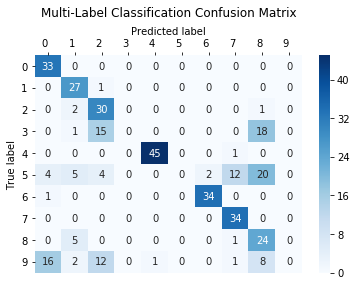

In [9]:
cm = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

cm.yaxis.set_ticklabels(cm.yaxis.get_ticklabels(), rotation=0, ha='right')
cm.xaxis.set_ticklabels(cm.xaxis.get_ticklabels(), rotation=0, ha='right')
cm.xaxis.tick_top()
cm.xaxis.set_label_position('top')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Multi-Label Classification Confusion Matrix', y=1.15)
plt.savefig('images/multi-label_classification_confusion_matrix.png')

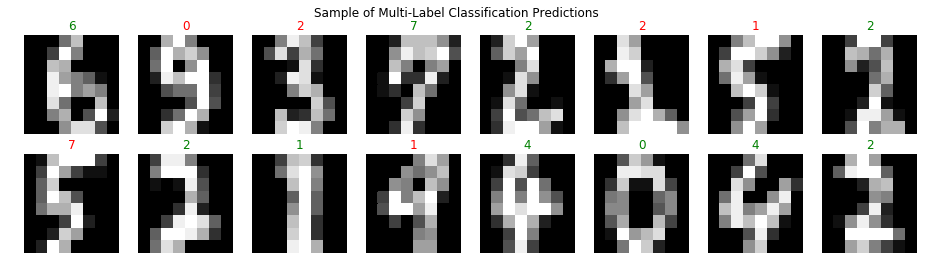

In [10]:
n_rows = 2
n_cols = 8
n_total = n_rows * n_cols
n_total = min(n_total, N)

width_ratio = 2
height_ratio = 2

figsize = (int(width_ratio * n_cols), int(height_ratio * n_rows))
fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
axes = axes.ravel()

for ax, image, expected, actual in zip(axes, X_test[:n_total], y_test[:n_total], y_pred[:n_total]):
    sns.heatmap(image, cbar=False, cmap='gray', ax=ax)
    ax.set_axis_off()

    color = 'green' if expected == actual else 'red'
    ax.set_title('%d' % actual, color=color)

plt.suptitle('Sample of Multi-Label Classification Predictions')
plt.savefig('images/mutli-label_classification_prediction_sample.png')

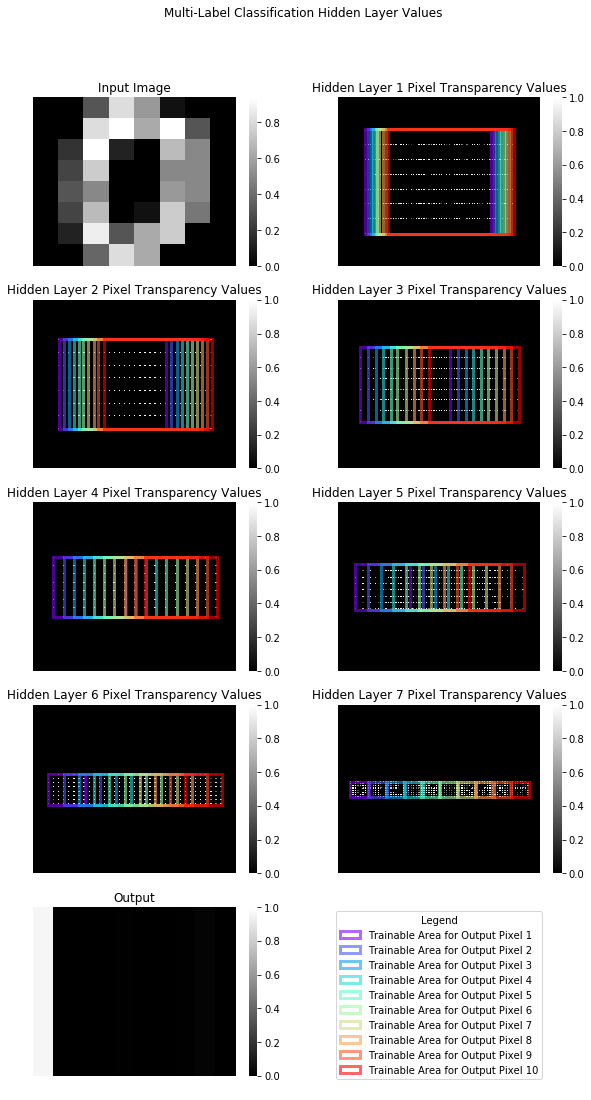

In [14]:
colors = plt.cm.rainbow(np.linspace(0, 1, clf.output_layer.n_rows * clf.output_layer.n_cols))

n_layers = 2 + clf.n_hidden_layers
n_cols = 2
n_rows = n_layers // 2

if n_layers % 2 > 0:
    n_rows += 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 18))
axes = axes.ravel()

ax = sns.heatmap(X[0], cmap='gray', ax=axes[0])
ax.set(title='Input Image')
ax.set_axis_off()

for (i, layer), ax in zip(enumerate(clf.hidden_layers), axes[1:-1]):
    ax = sns.heatmap(layer.pixel_values, vmin=0, cmap='gray', ax=ax)
        
    for row in range(clf.output_layer.n_rows):
        for col in range(clf.output_layer.n_cols):
            trained_pixels = clf.grid_W_map[row][col][i].keys() 

            min_extent = clf.hidden_layer_shape
            max_extent = (0, 0)

            for grid_coord in trained_pixels:
                grid_row, grid_col = grid_coord

                if grid_row < min_extent[0]:
                    min_extent = (grid_row, min_extent[1])

                if grid_row > max_extent[0]:
                    max_extent = (grid_row, max_extent[1])

                if grid_col < min_extent[1]:
                    min_extent = (min_extent[0], grid_col)

                if grid_col > max_extent[1]:
                    max_extent = (max_extent[0], grid_col)

            height = (max_extent[0] - min_extent[0]) + 1
            width = (max_extent[1] - min_extent[1]) + 1
            
            rect = patches.Rectangle((min_extent[1], min_extent[0]), width, height, 
                                     linewidth=3, alpha=0.6, edgecolor=colors[col], facecolor='none', 
                                     label='Trainable Area for Output Pixel %d' % (col + 1))

            ax.add_patch(rect)
            
        ax.set_axis_off()
        ax.set(title='Hidden Layer %d Pixel Transparency Values' % (i + 1))
        
ax.legend(title='Legend', loc='lower center', bbox_to_anchor=(0.5, -1.25))
        
ax = sns.heatmap(clf.predict_proba(X).detach().numpy()[0].reshape(1, -1), vmin=0, vmax=1, cmap='gray', ax=axes[n_layers - 1])
ax.set(title='Output')
ax.set_axis_off()

if n_layers % 2 > 0:
    fig.delaxes(axes[-1])

plt.suptitle('Multi-Label Classification Hidden Layer Values', y=0.95)
plt.savefig('images/multi-label_hidden_layer_values.png')